In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 


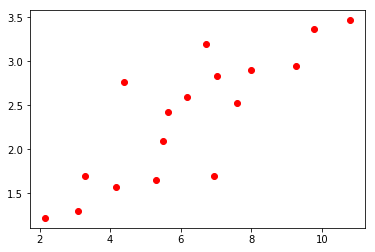

In [55]:
tf.reset_default_graph()

X_train = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                      7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
Y_train = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                      2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = X_train.shape[0]
n_samples
plt.plot(X_train, Y_train, 'ro')

In [56]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='y')
w = tf.get_variable('weight', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [57]:
Y_pred = w*X + b

In [58]:
loss = tf.square(Y - Y_pred, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [59]:
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())

Epoch 0 2.248045200810713
Epoch 1 0.3378809356106692
Epoch 2 0.2469177870079875
Epoch 3 0.23914439601289547
Epoch 4 0.2375310324029723
Epoch 5 0.23674188743461855
Epoch 6 0.23610148448428578
Epoch 7 0.23549330988487996
Epoch 8 0.2348954783999087
Epoch 9 0.2343036914612372
Epoch 10 0.23371719465478022
Epoch 11 0.23313567870525945
Epoch 12 0.23255908454645097
Epoch 13 0.23198741918552995
Epoch 14 0.2314205982744598
Epoch 15 0.23085863333964132
Epoch 16 0.23030144894843996
Epoch 17 0.2297490283862691
Epoch 18 0.2292012573856054
Epoch 19 0.22865817209666978
Epoch 20 0.2281197200217695
Epoch 21 0.22758582386419382
Epoch 22 0.22705652834353718
Epoch 23 0.22653162549801542
Epoch 24 0.22601124849809232
Epoch 25 0.22549525161021472
Epoch 26 0.22498377539116465
Epoch 27 0.2244765704804997
Epoch 28 0.2239736948726846
Epoch 29 0.22347510270628845
Epoch 30 0.22298068089987602
Epoch 31 0.22249055867424056
Epoch 32 0.22200459358282387
Epoch 33 0.2215227717790506
Epoch 34 0.22104498009224804
Epoch 35 

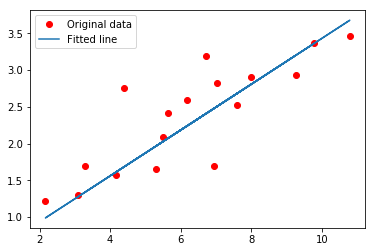

In [69]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x, y in zip(X_train, Y_train):
            _, _loss = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += _loss
        print('Epoch', i, total_loss/n_samples)

    plt.plot(X_train, Y_train, 'ro', label='Original data')
    plt.plot(X_train, sess.run(w) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()   
 

Epoch: 0050 cost= 0.079686232 W= 0.22083151 b= 1.0083787
Epoch: 0100 cost= 0.079377562 W= 0.22254199 b= 0.9960738
Epoch: 0150 cost= 0.079104334 W= 0.22415091 b= 0.984499
Epoch: 0200 cost= 0.078862496 W= 0.2256643 b= 0.973612
Epoch: 0250 cost= 0.078648463 W= 0.22708762 b= 0.96337247
Epoch: 0300 cost= 0.078458987 W= 0.22842628 b= 0.9537425
Epoch: 0350 cost= 0.078291342 W= 0.22968502 b= 0.94468725
Epoch: 0400 cost= 0.078142934 W= 0.23086892 b= 0.9361702
Epoch: 0450 cost= 0.078011528 W= 0.23198247 b= 0.92815983
Epoch: 0500 cost= 0.077895202 W= 0.23302977 b= 0.9206258
Epoch: 0550 cost= 0.077792235 W= 0.23401473 b= 0.9135399
Epoch: 0600 cost= 0.077701025 W= 0.2349412 b= 0.9068746
Epoch: 0650 cost= 0.077620283 W= 0.23581254 b= 0.9006063
Epoch: 0700 cost= 0.077548780 W= 0.23663214 b= 0.89471036
Epoch: 0750 cost= 0.077485479 W= 0.23740298 b= 0.889165
Epoch: 0800 cost= 0.077429399 W= 0.23812795 b= 0.88394946
Epoch: 0850 cost= 0.077379733 W= 0.23880982 b= 0.8790441
Epoch: 0900 cost= 0.077335738 W

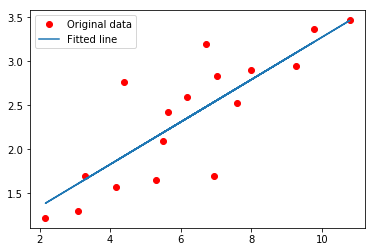

Testing... (Mean square loss Comparison)
Testing cost= 0.08119412
Absolute mean square loss difference: 0.0039318427


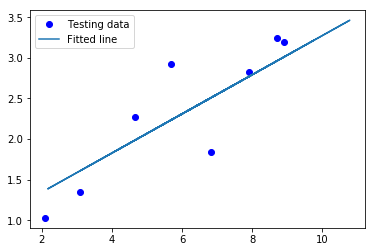

In [52]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()